In [1]:
import copy
import os
import sys
import time

import jax
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from helper import df_to_latex, fig_path, set_figsize, tab_path

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# Import code from src
sys.path.insert(0, '../src/')
import vmc  # noqa

# Set plot and dataframe style
sns.set(context="paper", style='darkgrid', rc={"axes.facecolor": "0.96"})

fontsize = "large"
params = {"font.family": "serif",
          "font.sans-serif": ["Computer Modern"],
          "axes.labelsize": fontsize,
          "legend.fontsize": fontsize,
          "xtick.labelsize": fontsize,
          "ytick.labelsize": fontsize,
          "legend.handlelength": 2
          }

plt.rcParams.update(params)
plt.rc('text', usetex=True)

pd.set_option('display.max_columns', 50)

jax.config.update("jax_enable_x64", True)
jax.config.update('jax_platform_name', 'cpu')

# RWM

## eta = 0.01

Sampler elapsed time: 15.842656135559082


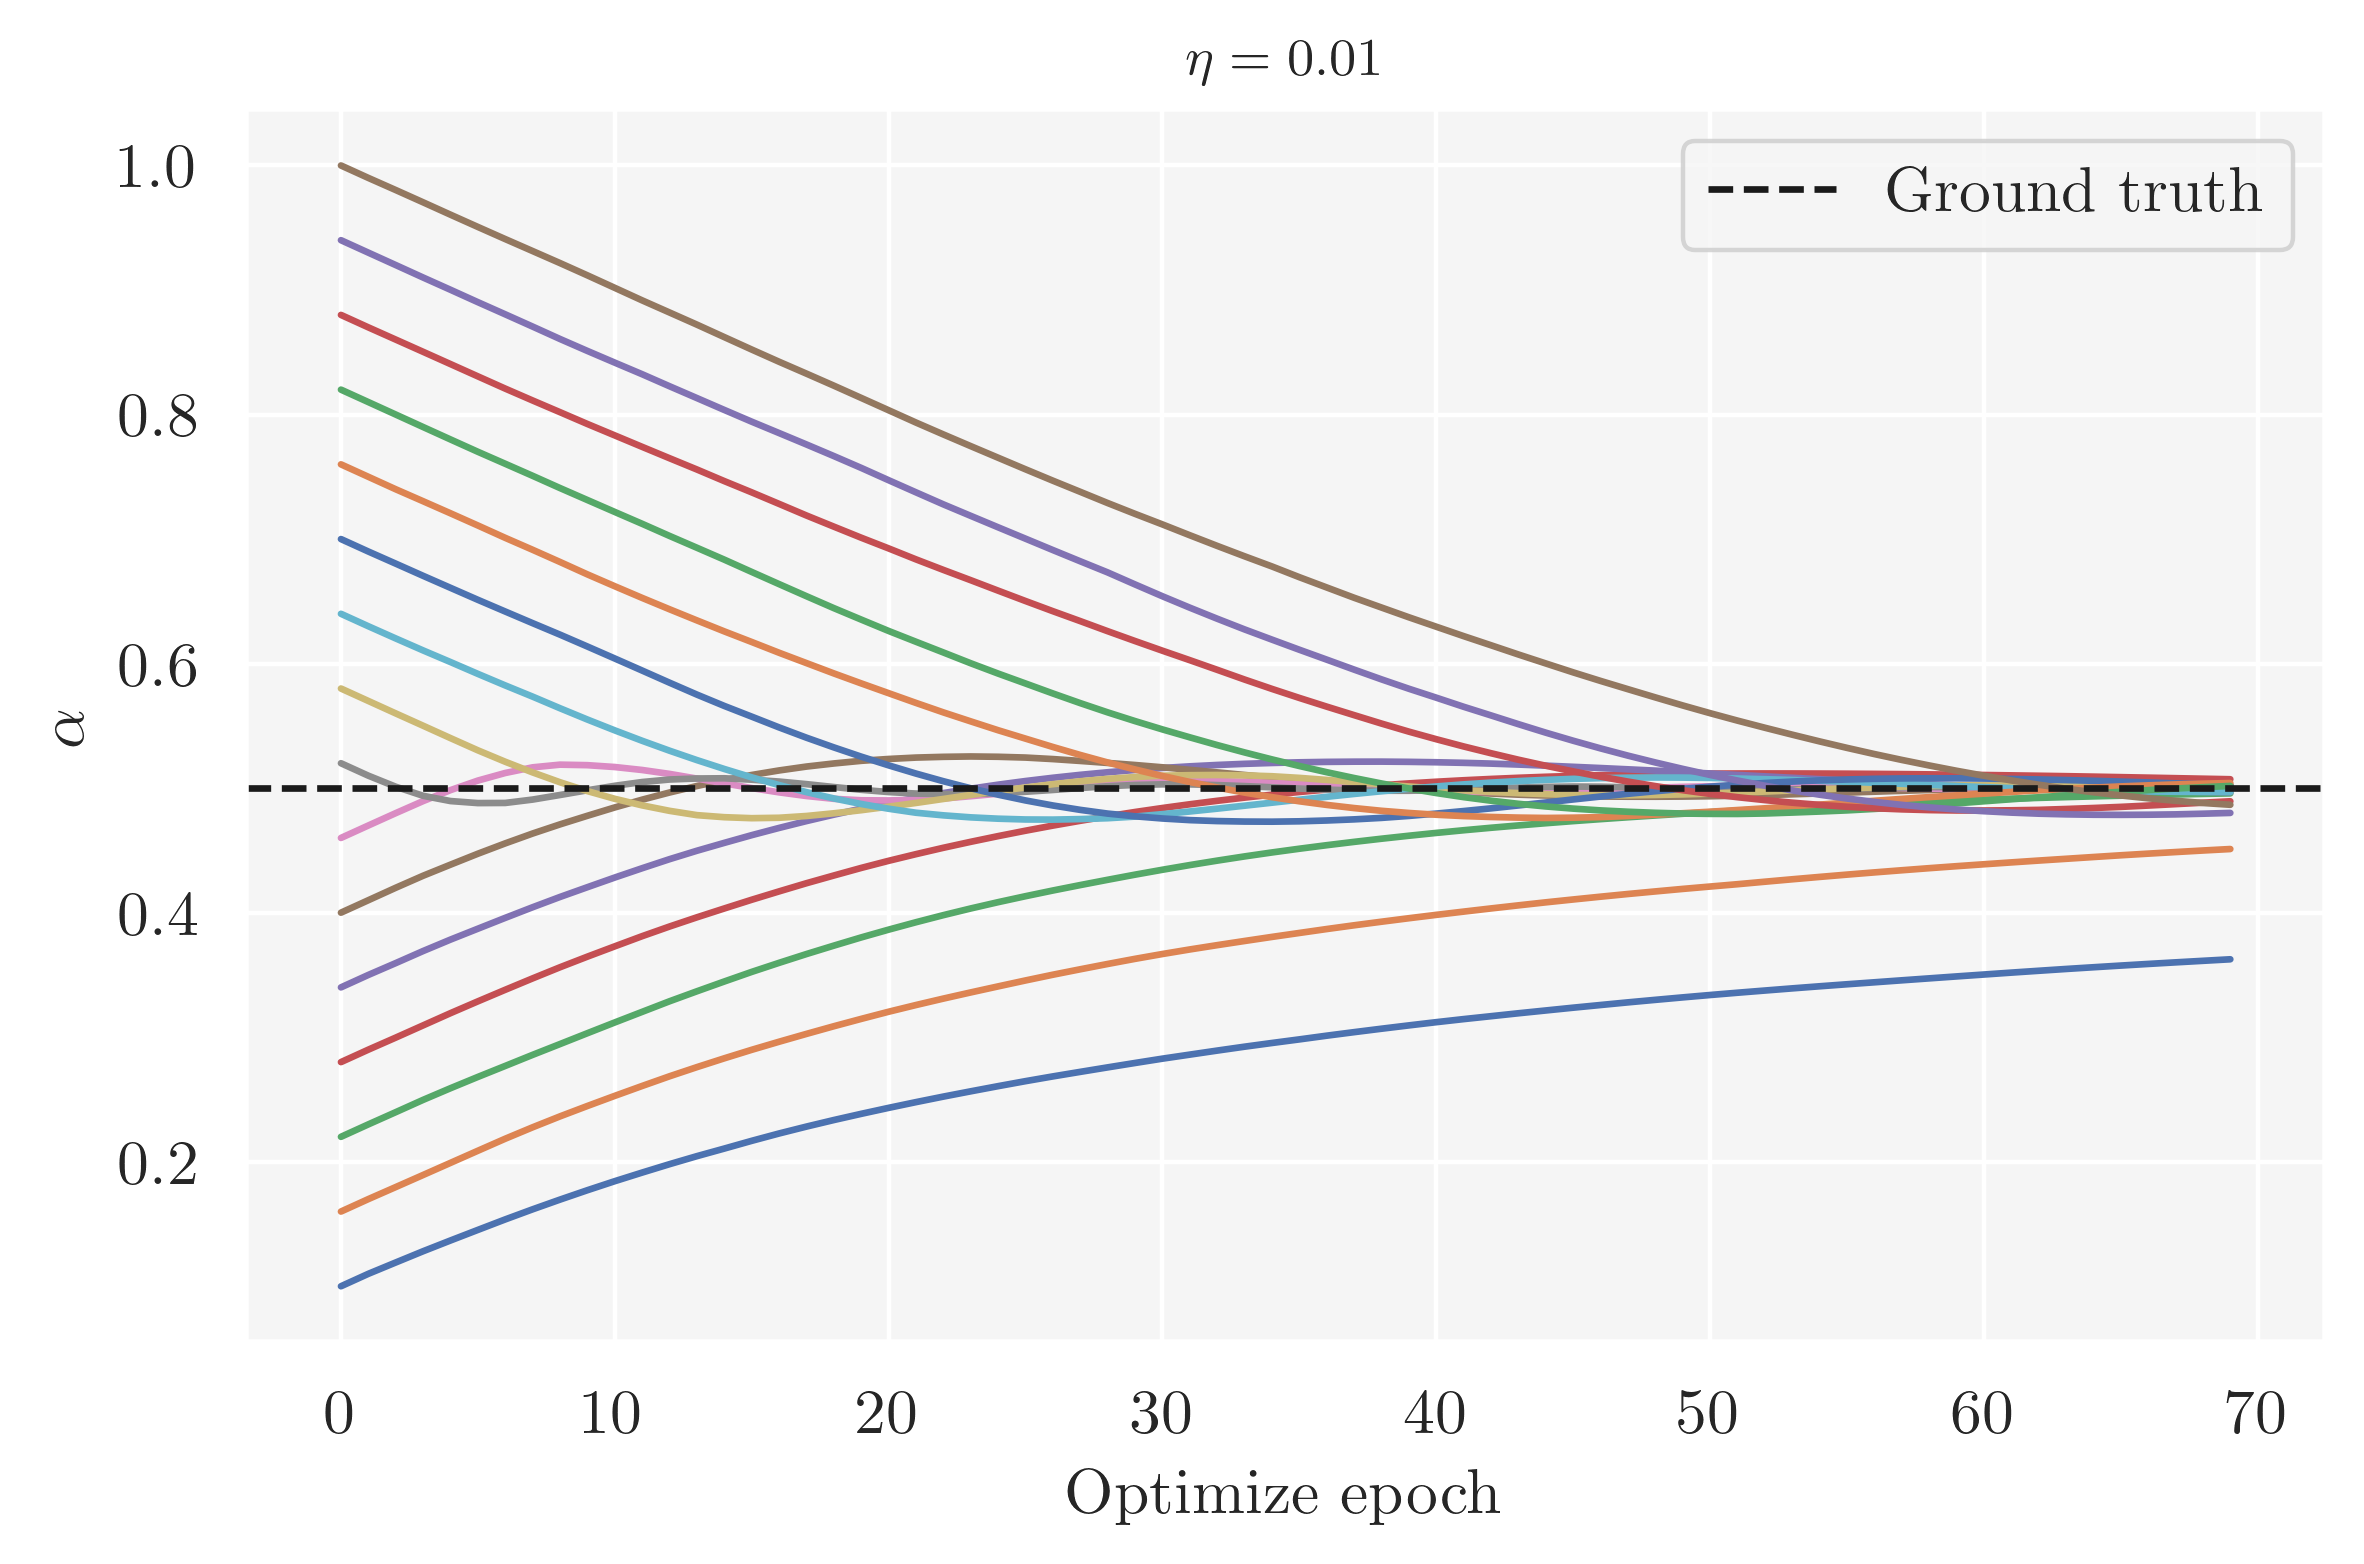

In [2]:
N = 2        # Number of particles
dim = 3      # Dimensionality

# Config
nsamples = 128
nchains = 16
eta = 0.01
initial_alphas = np.linspace(0.1, 1.0, nchains)

# Instantiate wave function
wf = vmc.ASHONIB(N, dim)

# Set intial positions
initial_positions = []
for initial_alpha in initial_alphas:
    r0 = vmc.utils.safe_initial_positions(wf,
                                          initial_alpha,
                                          N,
                                          dim,
                                          interaction=False
                                         )
    initial_positions.append(r0)


# Instantiate sampler
sampler = vmc.experimental.RWMEvolution(wf)

start = time.time()
results = sampler.sample(nsamples,
                         initial_positions,
                         initial_alphas,
                         scale=1.0,
                         nchains=nchains,
                         seed=None,
                         tune=True,
                         tune_iter=10000,
                         tune_interval=500,
                         tol_tune=1e-5,
                         optimize=True,
                         max_iter=70000,
                         batch_size=1000,
                         gradient_method='adam',
                         eta=eta,
                         tol_optim=1e-5,
                         early_stop=False,
                         log=False,
                         logger_level="INFO",
                         )

end = time.time()
print("Sampler elapsed time:", end - start)

alpha_updates = sampler.alpha_updates 

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True, dpi=200)
for alpha_tmp in alpha_updates:
    ax.plot(alpha_tmp)

ax.set(xlabel="Optimize epoch", ylabel=r"$\alpha$")
ax.axhline(0.5, ls='--', color='k', label="Ground truth")
    
ax.set(xlabel="Optimize epoch", ylabel=r"$\alpha$", title=fr'$\eta={eta}$')
ax.legend()

fig.savefig(fig_path("alpha_epoch_rwm_ashonib_eta001.pdf"), bbox_inches='tight')

## eta = 0.05

Sampler elapsed time: 15.515667915344238


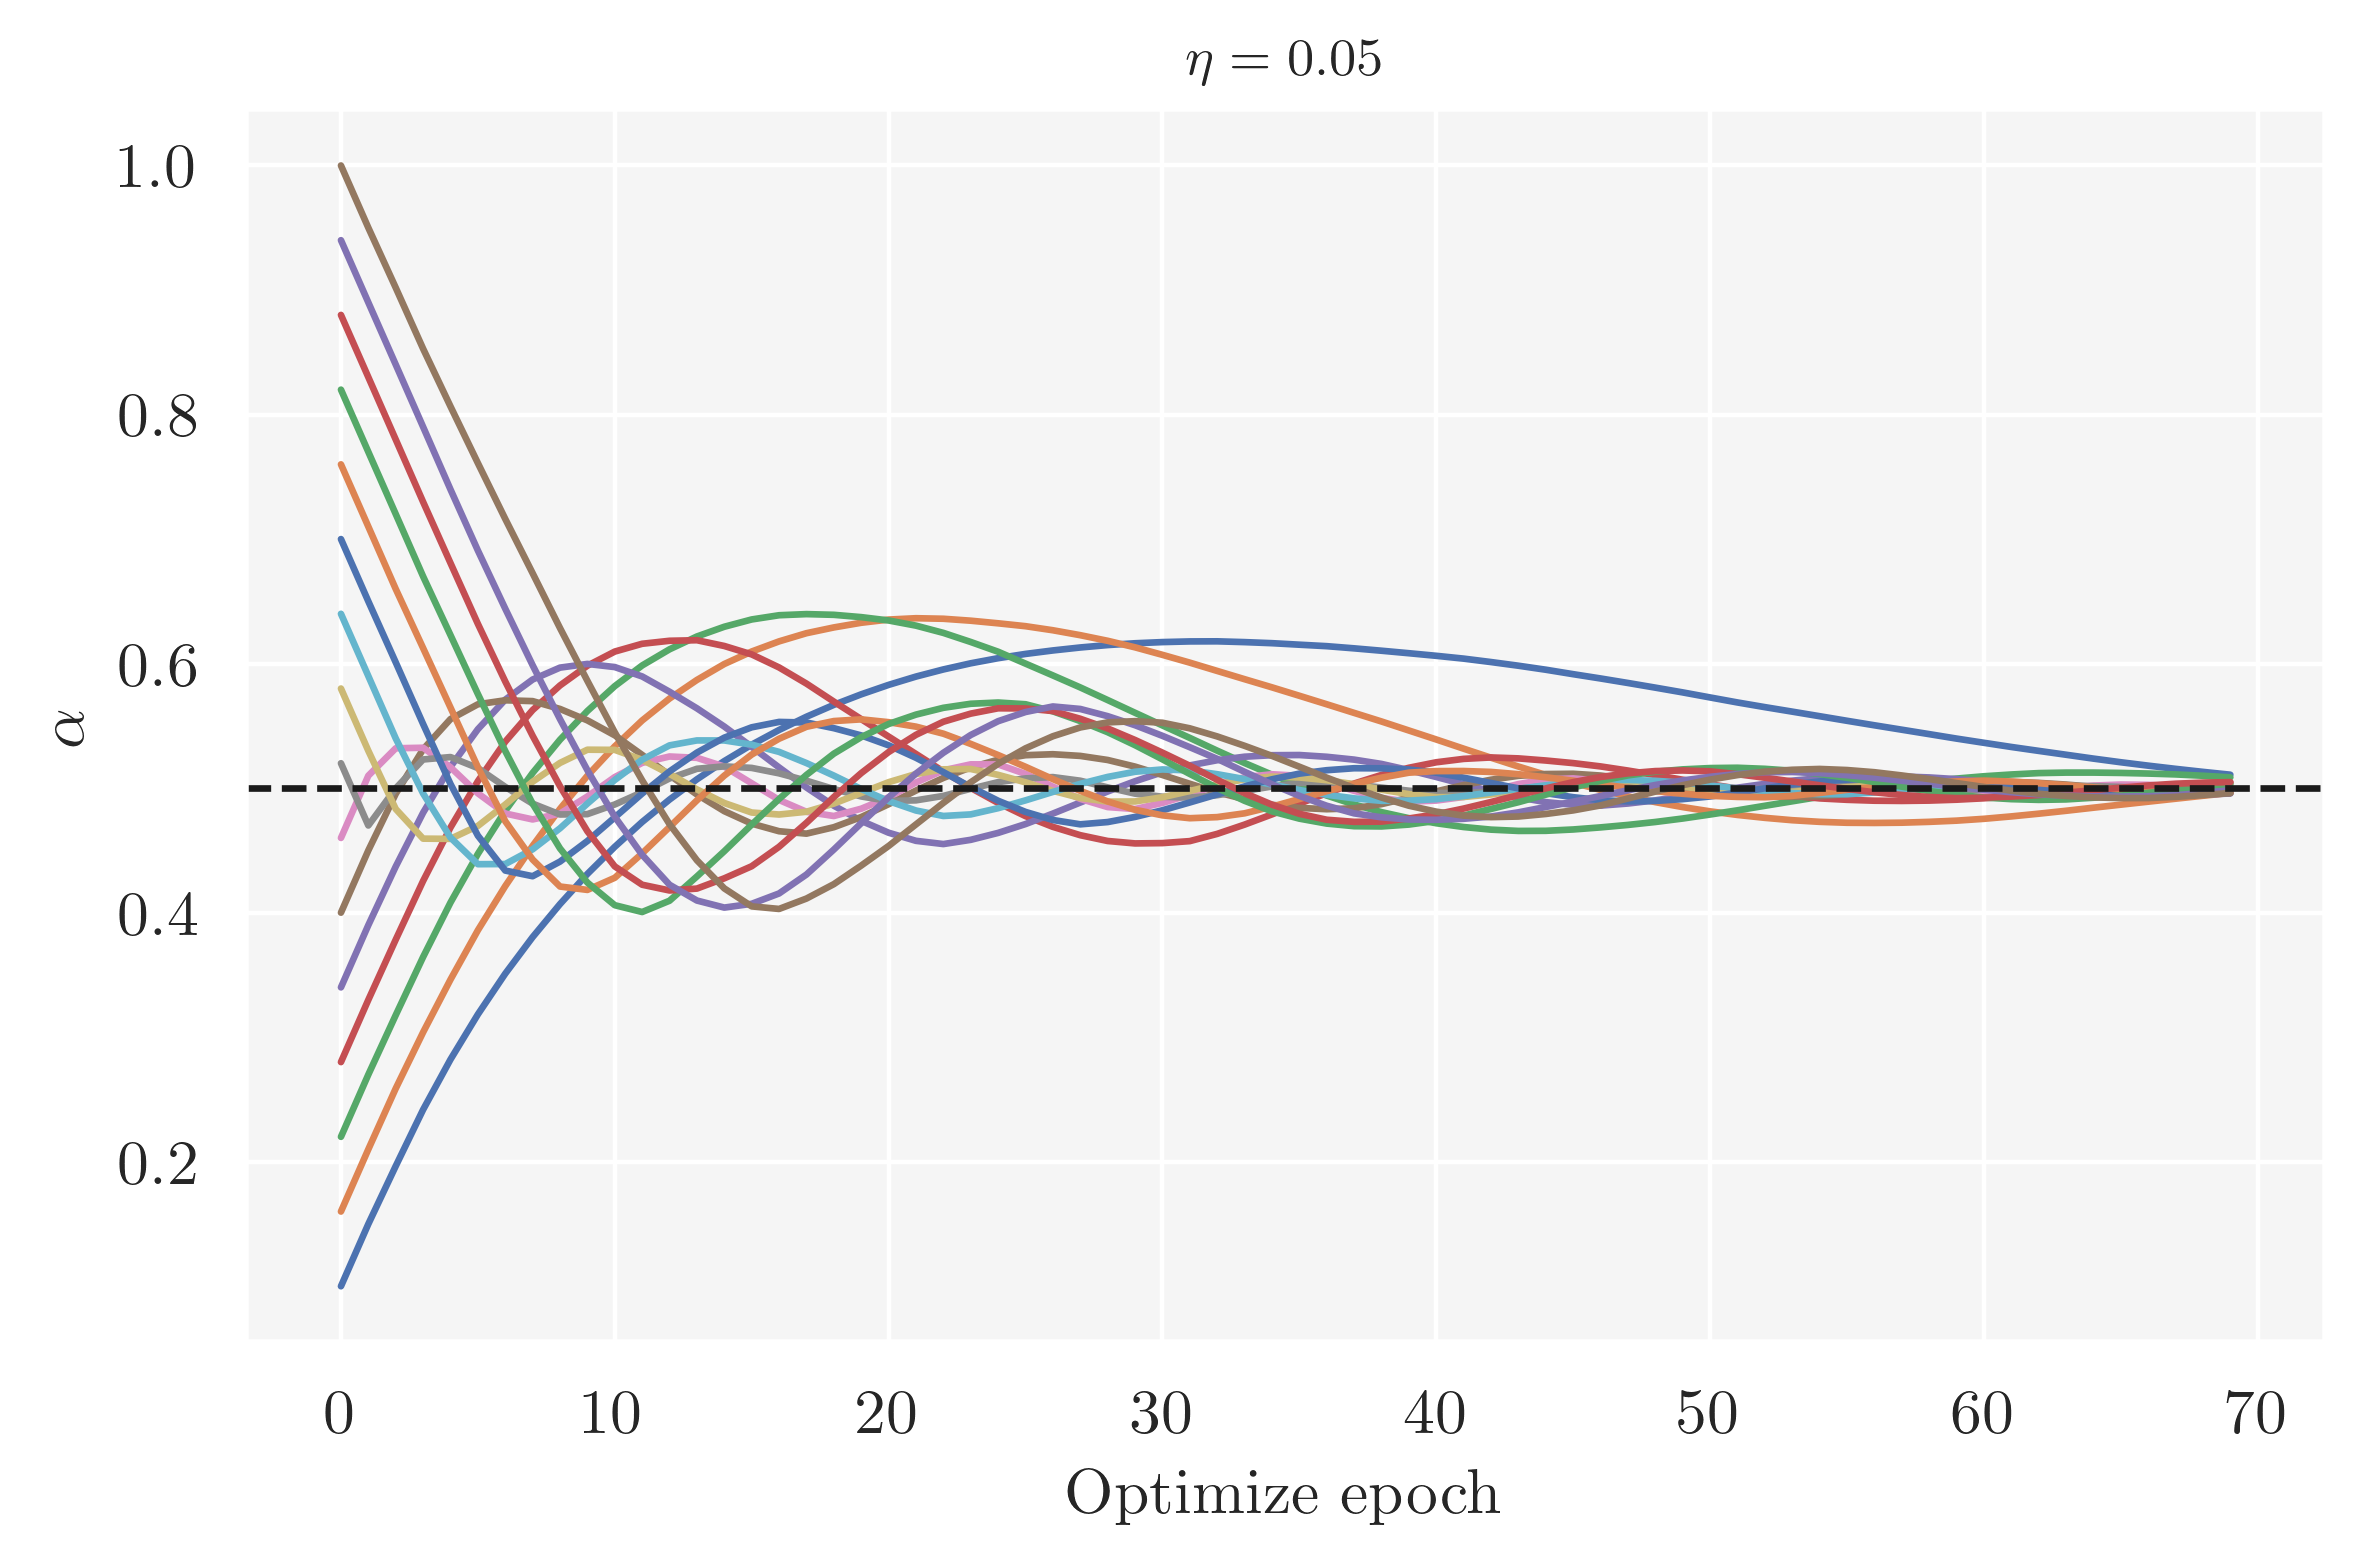

In [3]:
N = 2        # Number of particles
dim = 3      # Dimensionality

# Config
nsamples = 128
nchains = 16
eta = 0.05
initial_alphas = np.linspace(0.1, 1.0, nchains)

# Instantiate wave function
wf = vmc.ASHONIB(N, dim)

# Set intial positions
initial_positions = []
for initial_alpha in initial_alphas:
    r0 = vmc.utils.safe_initial_positions(wf,
                                          initial_alpha,
                                          N,
                                          dim,
                                          interaction=False
                                         )
    initial_positions.append(r0)


# Instantiate sampler
sampler = vmc.experimental.RWMEvolution(wf)

start = time.time()
results = sampler.sample(nsamples,
                         initial_positions,
                         initial_alphas,
                         scale=1.0,
                         nchains=nchains,
                         seed=None,
                         tune=True,
                         tune_iter=10000,
                         tune_interval=500,
                         tol_tune=1e-5,
                         optimize=True,
                         max_iter=70000,
                         batch_size=1000,
                         gradient_method='adam',
                         eta=eta,
                         tol_optim=1e-5,
                         early_stop=False,
                         log=False,
                         logger_level="INFO",
                         )

end = time.time()
print("Sampler elapsed time:", end - start)

alpha_updates = sampler.alpha_updates 

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True, dpi=200)
for alpha_tmp in alpha_updates:
    ax.plot(alpha_tmp)

ax.set(xlabel="Optimize epoch", ylabel=r"$\alpha$", title=fr'$\eta={eta}$')
ax.axhline(0.5, ls='--', color='k')

fig.savefig(fig_path("alpha_epoch_rwm_ashonib_eta005.pdf"), bbox_inches='tight')

## eta = 0.1

Sampler elapsed time: 15.51353120803833


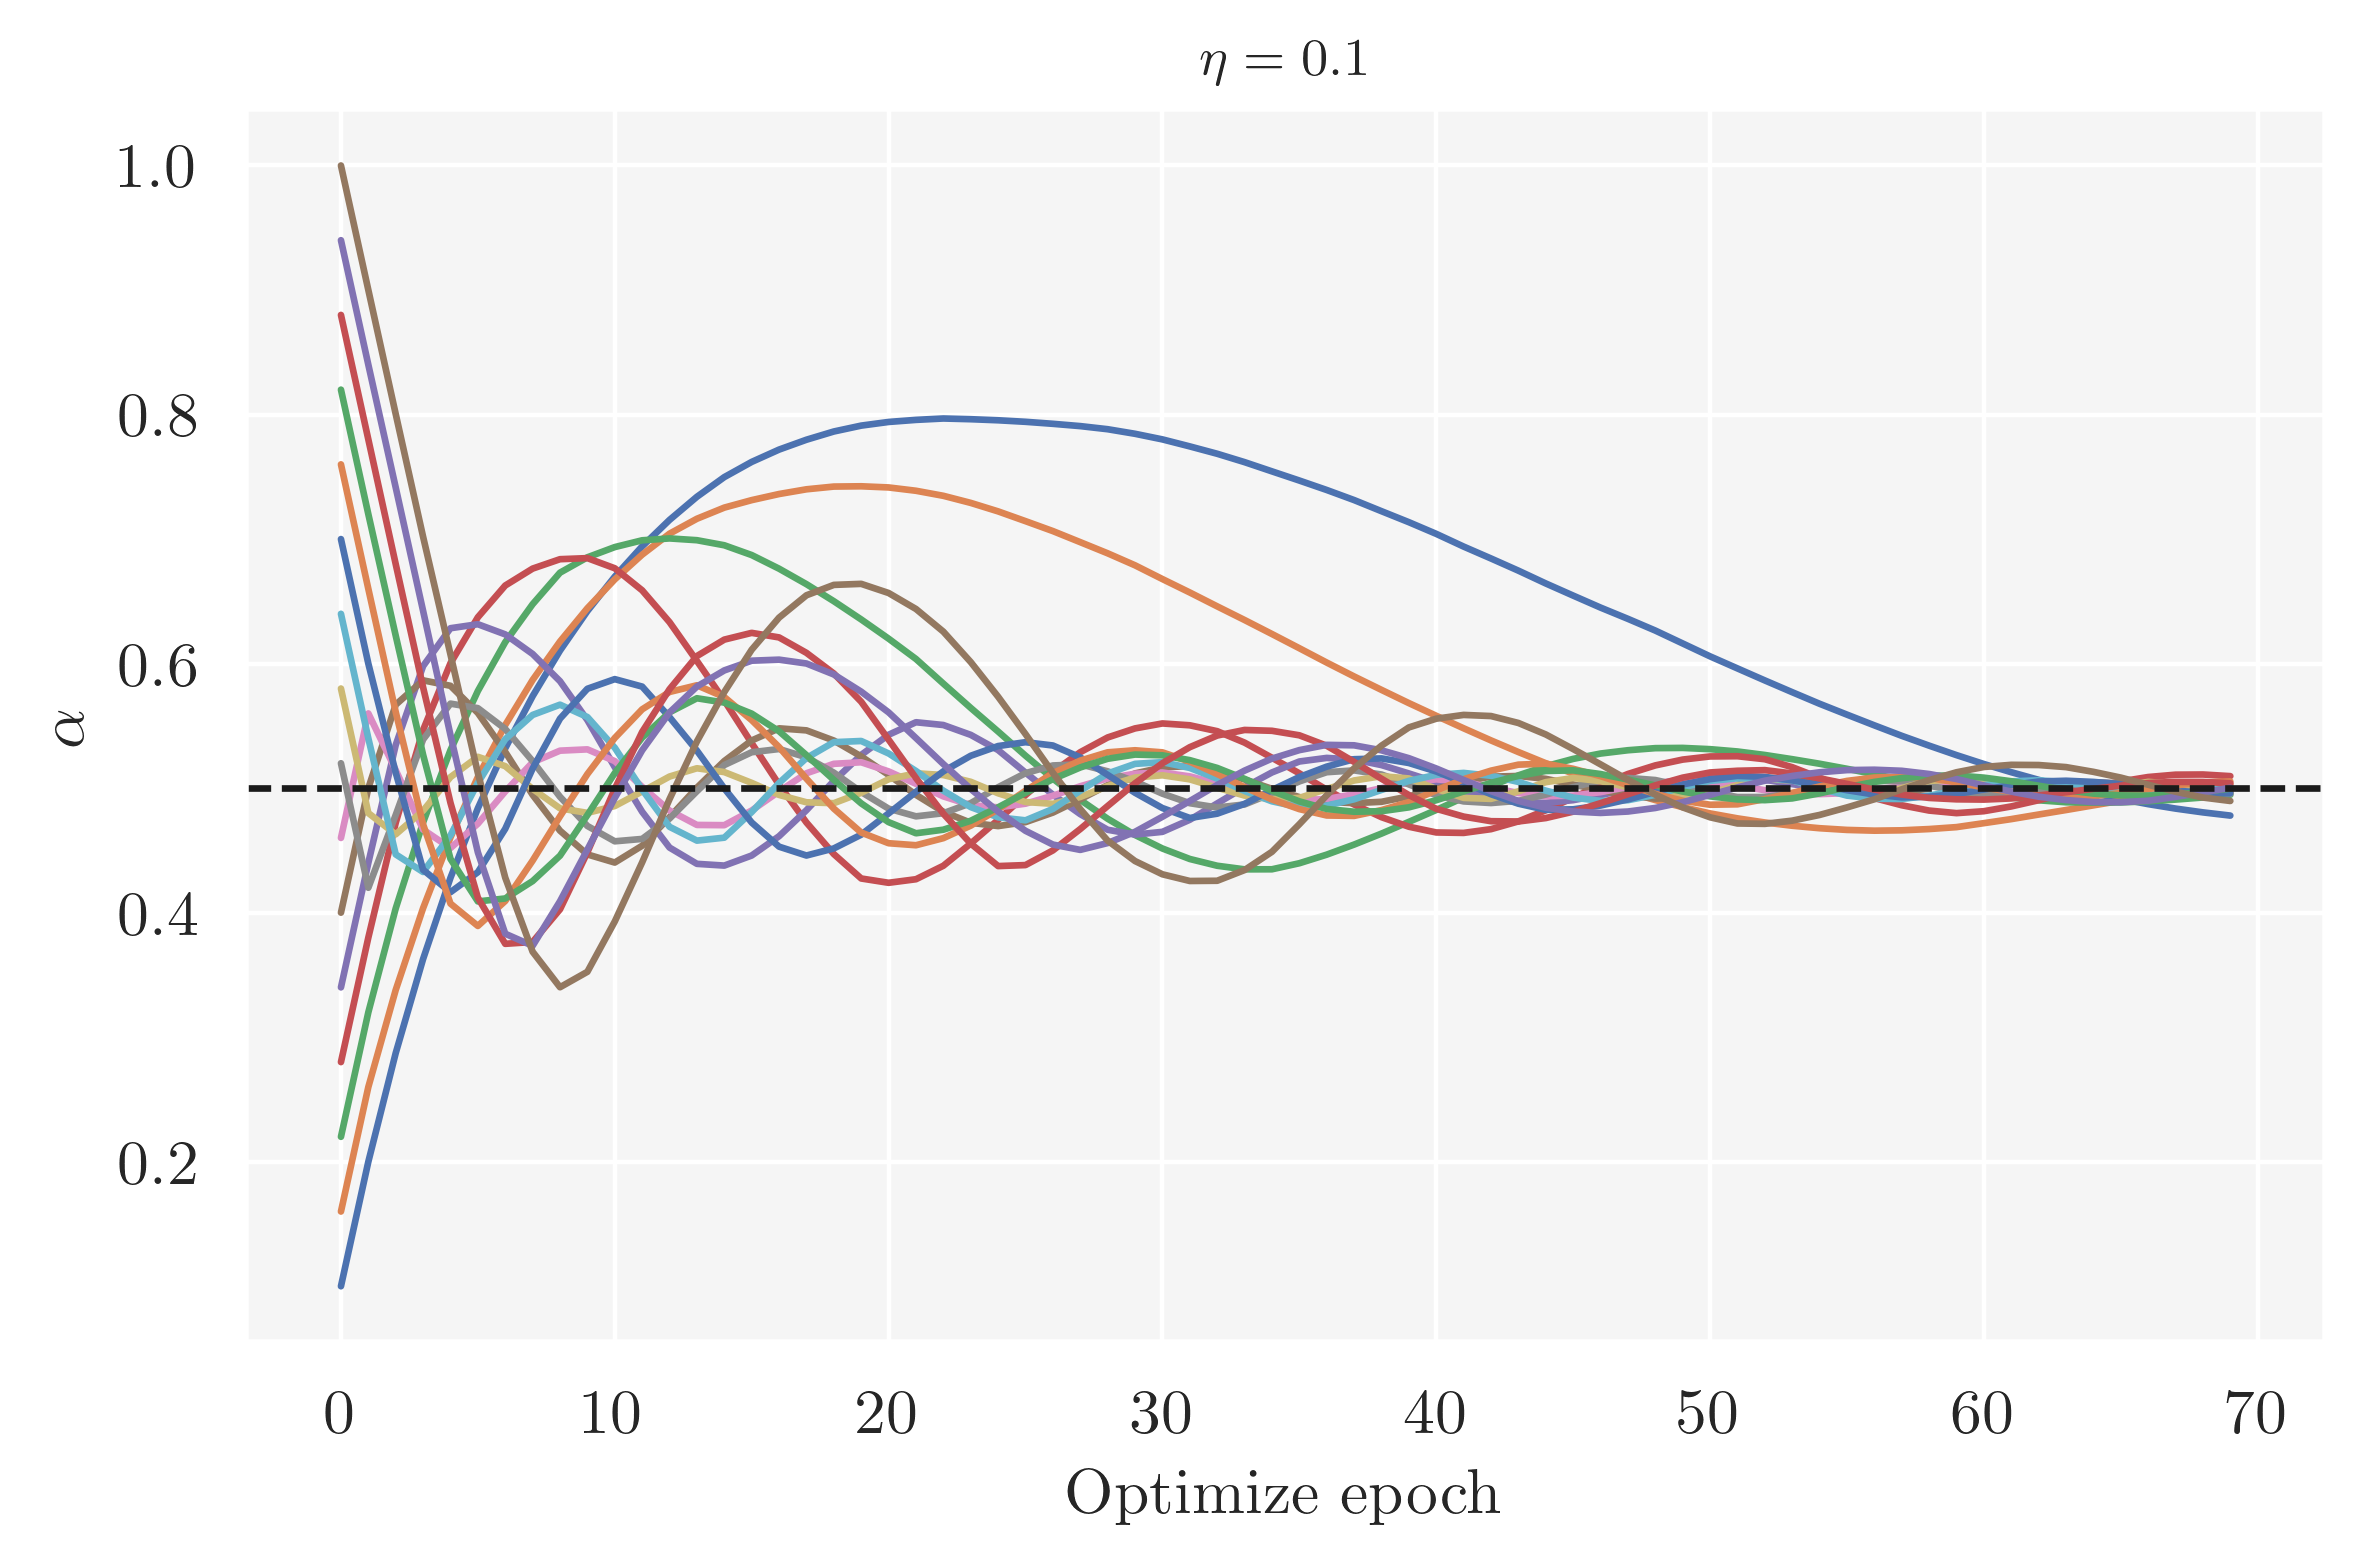

In [4]:
N = 2        # Number of particles
dim = 3      # Dimensionality

# Config
nsamples = 128
nchains = 16
eta = 0.1
initial_alphas = np.linspace(0.1, 1.0, nchains)

# Instantiate wave function
wf = vmc.ASHONIB(N, dim)

# Set intial positions
initial_positions = []
for initial_alpha in initial_alphas:
    r0 = vmc.utils.safe_initial_positions(wf,
                                          initial_alpha,
                                          N,
                                          dim,
                                          interaction=False
                                         )
    initial_positions.append(r0)


# Instantiate sampler
sampler = vmc.experimental.RWMEvolution(wf)

start = time.time()
results = sampler.sample(nsamples,
                         initial_positions,
                         initial_alphas,
                         scale=1.0,
                         nchains=nchains,
                         seed=None,
                         tune=True,
                         tune_iter=10000,
                         tune_interval=500,
                         tol_tune=1e-5,
                         optimize=True,
                         max_iter=70000,
                         batch_size=1000,
                         gradient_method='adam',
                         eta=eta,
                         tol_optim=1e-5,
                         early_stop=False,
                         log=False,
                         logger_level="INFO",
                         )

end = time.time()
print("Sampler elapsed time:", end - start)

alpha_updates = sampler.alpha_updates 

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True, dpi=200)
for alpha_tmp in alpha_updates:
    ax.plot(alpha_tmp)

ax.set(xlabel="Optimize epoch", ylabel=r"$\alpha$", title=fr'$\eta={eta}$')
ax.axhline(0.5, ls='--', color='k')

fig.savefig(fig_path("alpha_epoch_rwm_ashonib_eta01.pdf"), bbox_inches='tight')

## eta = 0.5

Sampler elapsed time: 16.938282251358032


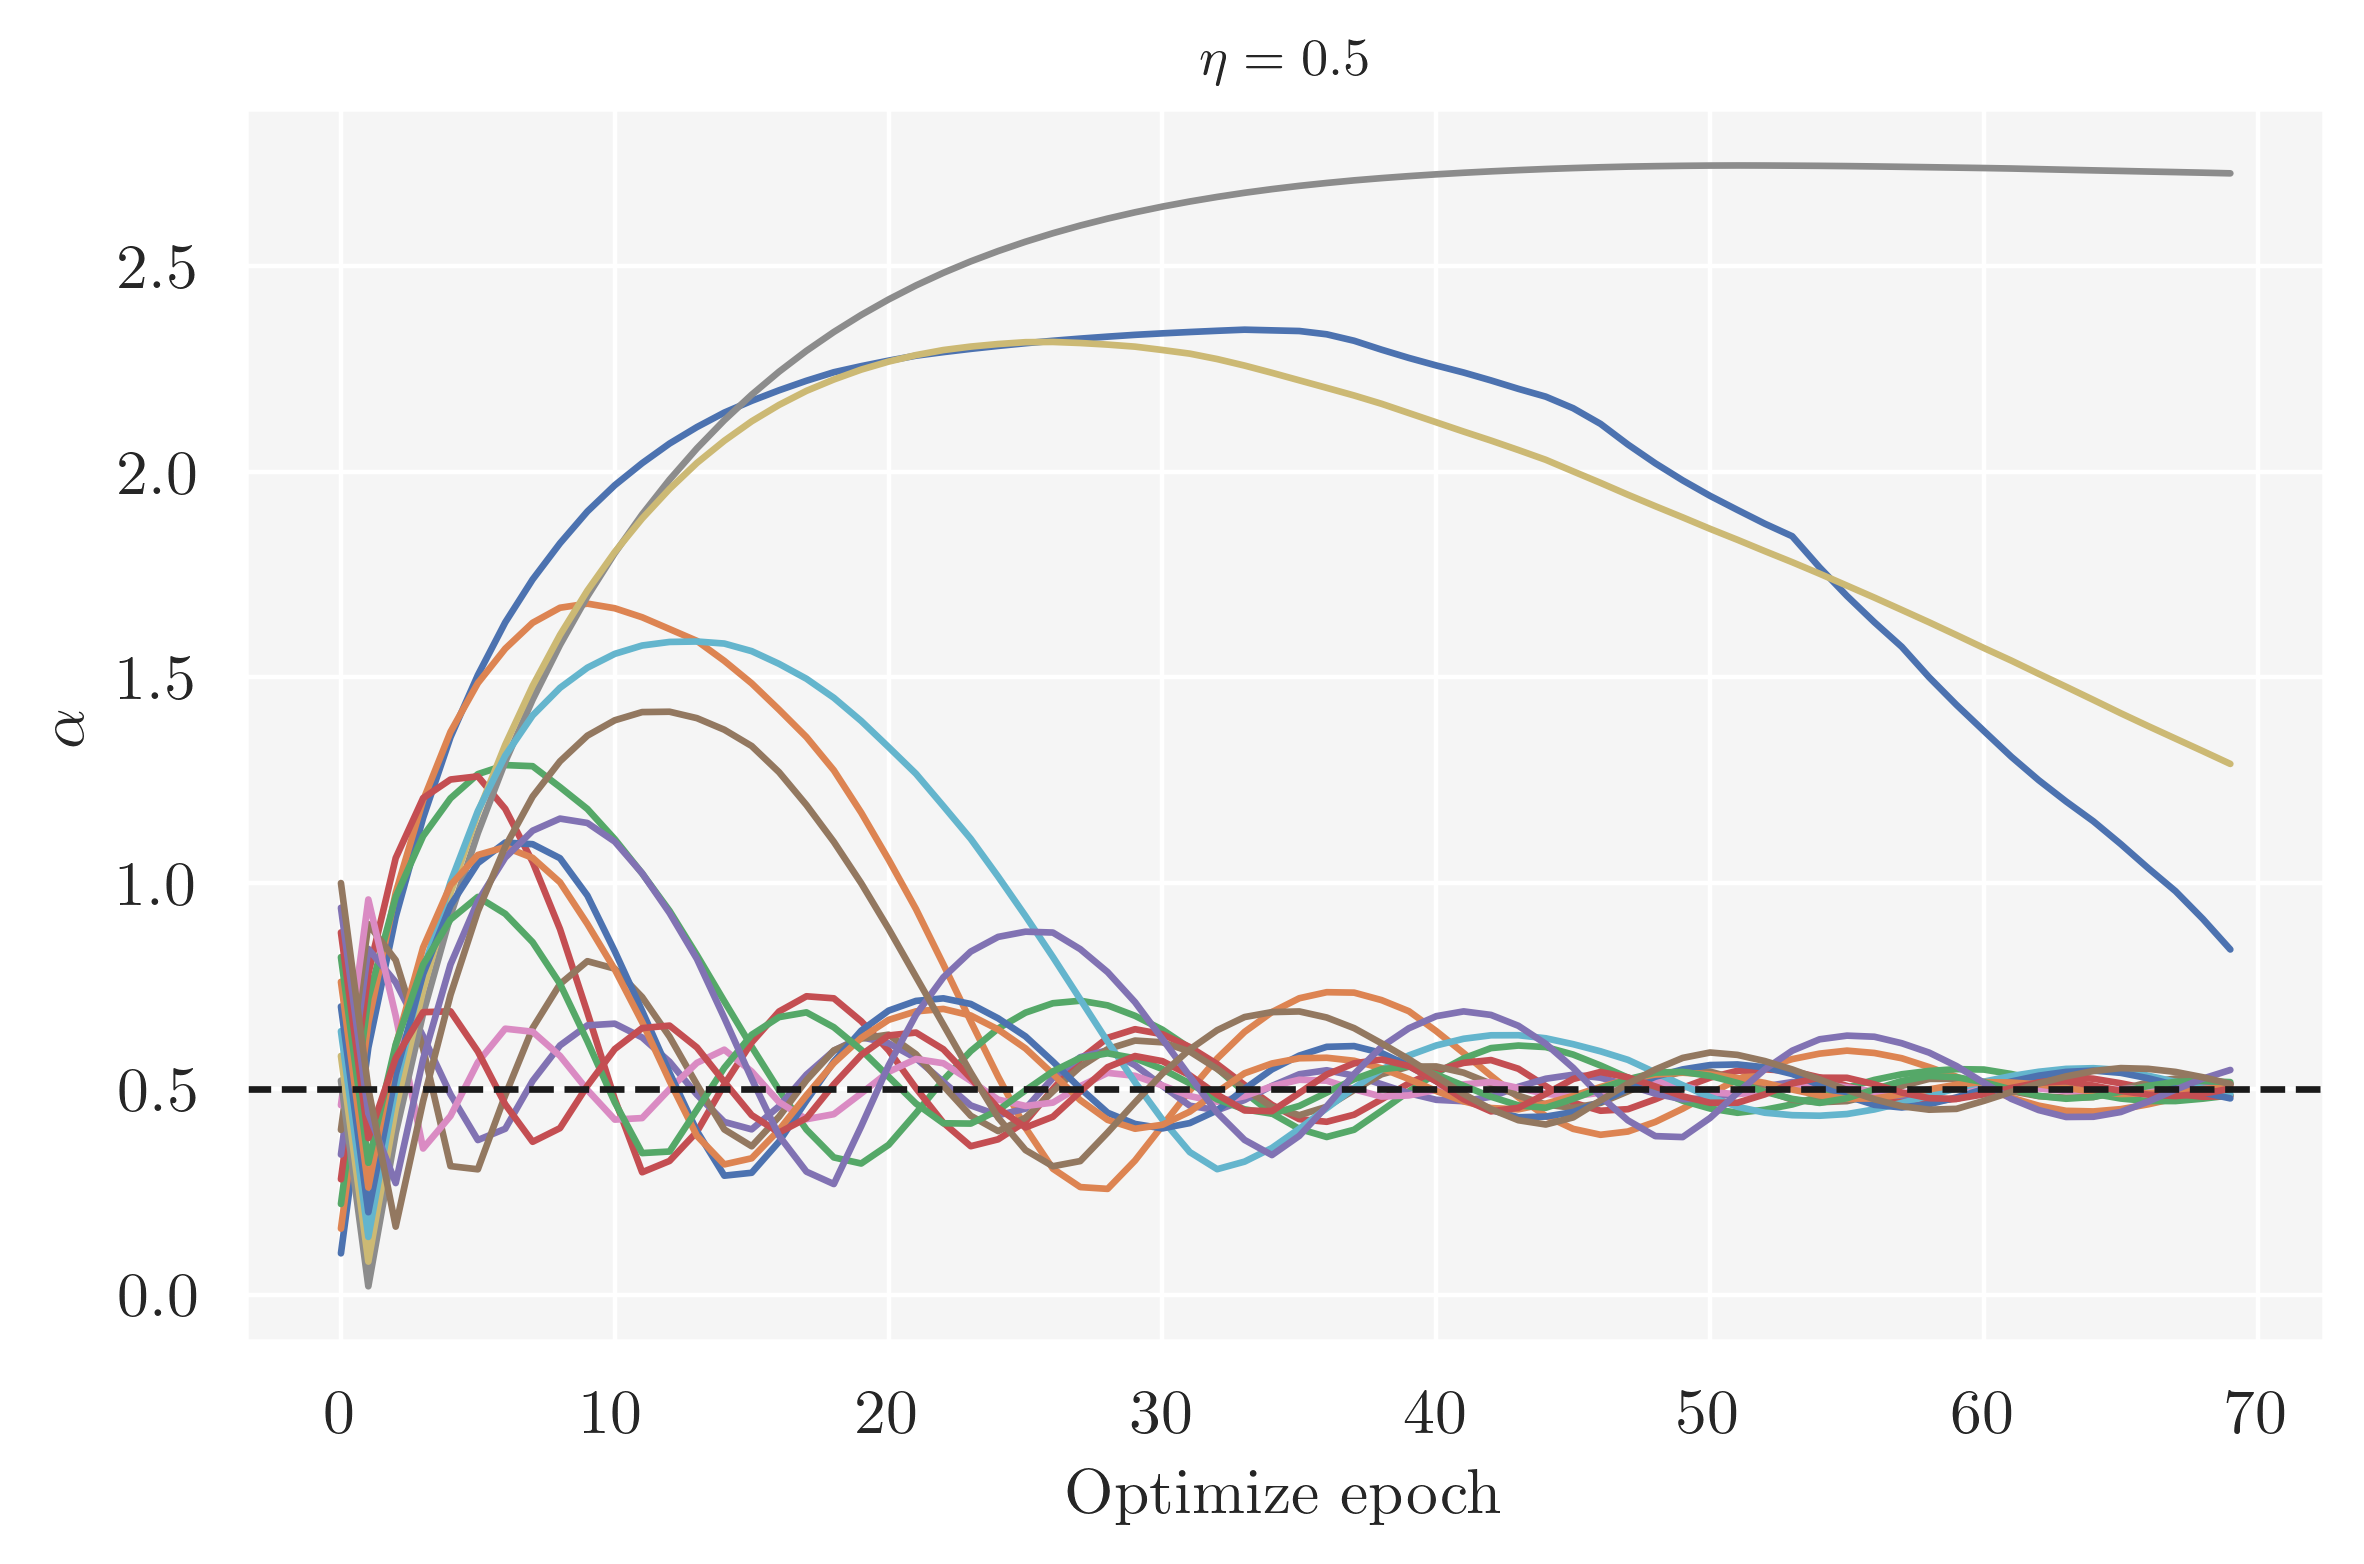

In [5]:
N = 2        # Number of particles
dim = 3      # Dimensionality

# Config
nsamples = 128
nchains = 16
eta = 0.5
initial_alphas = np.linspace(0.1, 1.0, nchains)

# Instantiate wave function
wf = vmc.ASHONIB(N, dim)

# Set intial positions
initial_positions = []
for initial_alpha in initial_alphas:
    r0 = vmc.utils.safe_initial_positions(wf,
                                          initial_alpha,
                                          N,
                                          dim,
                                          interaction=False
                                         )
    initial_positions.append(r0)


# Instantiate sampler
sampler = vmc.experimental.RWMEvolution(wf)

start = time.time()
results = sampler.sample(nsamples,
                         initial_positions,
                         initial_alphas,
                         scale=1.0,
                         nchains=nchains,
                         seed=None,
                         tune=True,
                         tune_iter=10000,
                         tune_interval=500,
                         tol_tune=1e-5,
                         optimize=True,
                         max_iter=70000,
                         batch_size=1000,
                         gradient_method='adam',
                         eta=eta,
                         tol_optim=1e-5,
                         early_stop=False,
                         log=False,
                         logger_level="INFO",
                         )

end = time.time()
print("Sampler elapsed time:", end - start)

alpha_updates = sampler.alpha_updates 

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True, dpi=200)
for alpha_tmp in alpha_updates:
    ax.plot(alpha_tmp)

ax.set(xlabel="Optimize epoch", ylabel=r"$\alpha$", title=fr'$\eta={eta}$')
ax.axhline(0.5, ls='--', color='k')

fig.savefig(fig_path("alpha_epoch_rwm_ashonib_eta05.pdf"), bbox_inches='tight')

# LMH

## eta = 0.01

Sampler elapsed time: 20.95678687095642


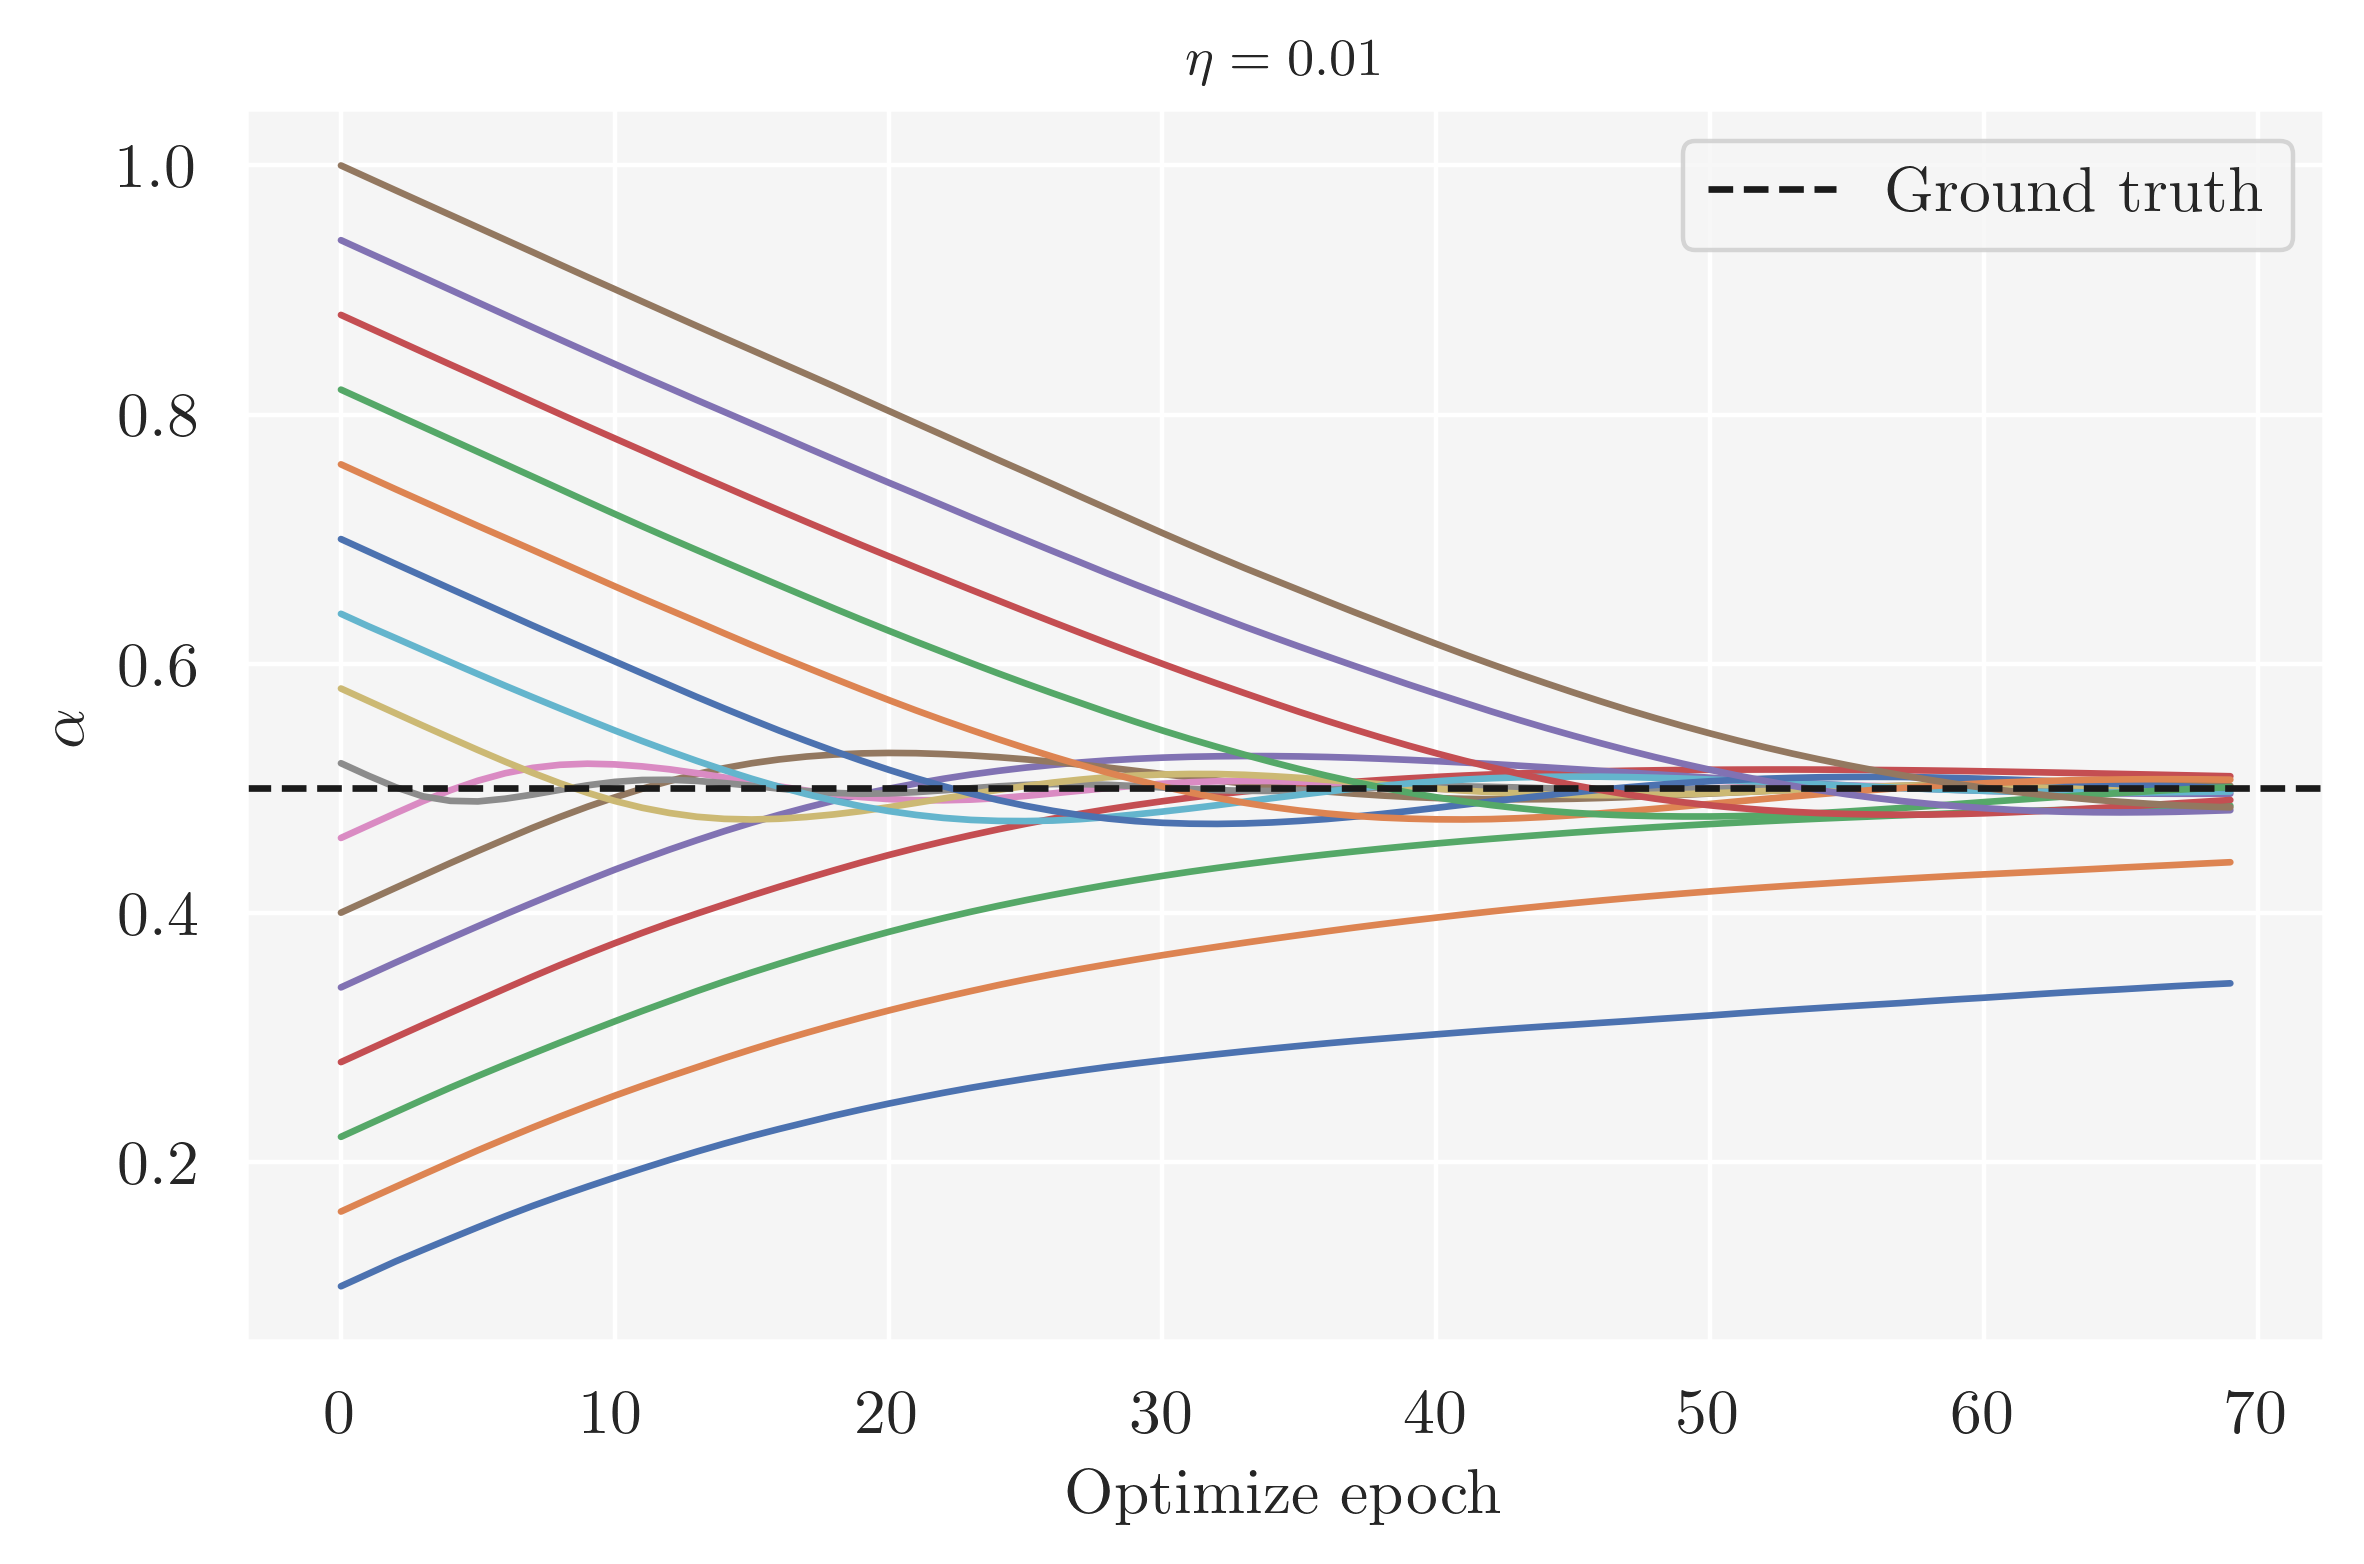

In [6]:
N = 2        # Number of particles
dim = 3      # Dimensionality

# Config
nsamples = 128
nchains = 16
eta = 0.01
initial_alphas = np.linspace(0.1, 1.0, nchains)

# Instantiate wave function
wf = vmc.ASHONIB(N, dim)

# Set intial positions
initial_positions = []
for initial_alpha in initial_alphas:
    r0 = vmc.utils.safe_initial_positions(wf,
                                          initial_alpha,
                                          N,
                                          dim,
                                          interaction=False
                                         )
    initial_positions.append(r0)


# Instantiate sampler
sampler = vmc.experimental.LMHEvolution(wf)

start = time.time()
results = sampler.sample(nsamples,
                         initial_positions,
                         initial_alphas,
                         dt=0.5,
                         nchains=nchains,
                         seed=None,
                         tune=True,
                         tune_iter=10000,
                         tune_interval=500,
                         tol_tune=1e-5,
                         optimize=True,
                         max_iter=70000,
                         batch_size=1000,
                         gradient_method='adam',
                         eta=eta,
                         tol_optim=1e-5,
                         early_stop=False,
                         log=False,
                         logger_level="INFO",
                         )

end = time.time()
print("Sampler elapsed time:", end - start)

alpha_updates = sampler.alpha_updates 

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True, dpi=200)
for alpha_tmp in alpha_updates:
    ax.plot(alpha_tmp)

ax.set(xlabel="Optimize epoch", ylabel=r"$\alpha$")
ax.axhline(0.5, ls='--', color='k', label="Ground truth")
    
ax.set(xlabel="Optimize epoch", ylabel=r"$\alpha$", title=fr'$\eta={eta}$')
ax.legend()

fig.savefig(fig_path("alpha_epoch_lmh_ashonib_eta001.pdf"), bbox_inches='tight')

## eta = 0.05

Sampler elapsed time: 27.985613107681274


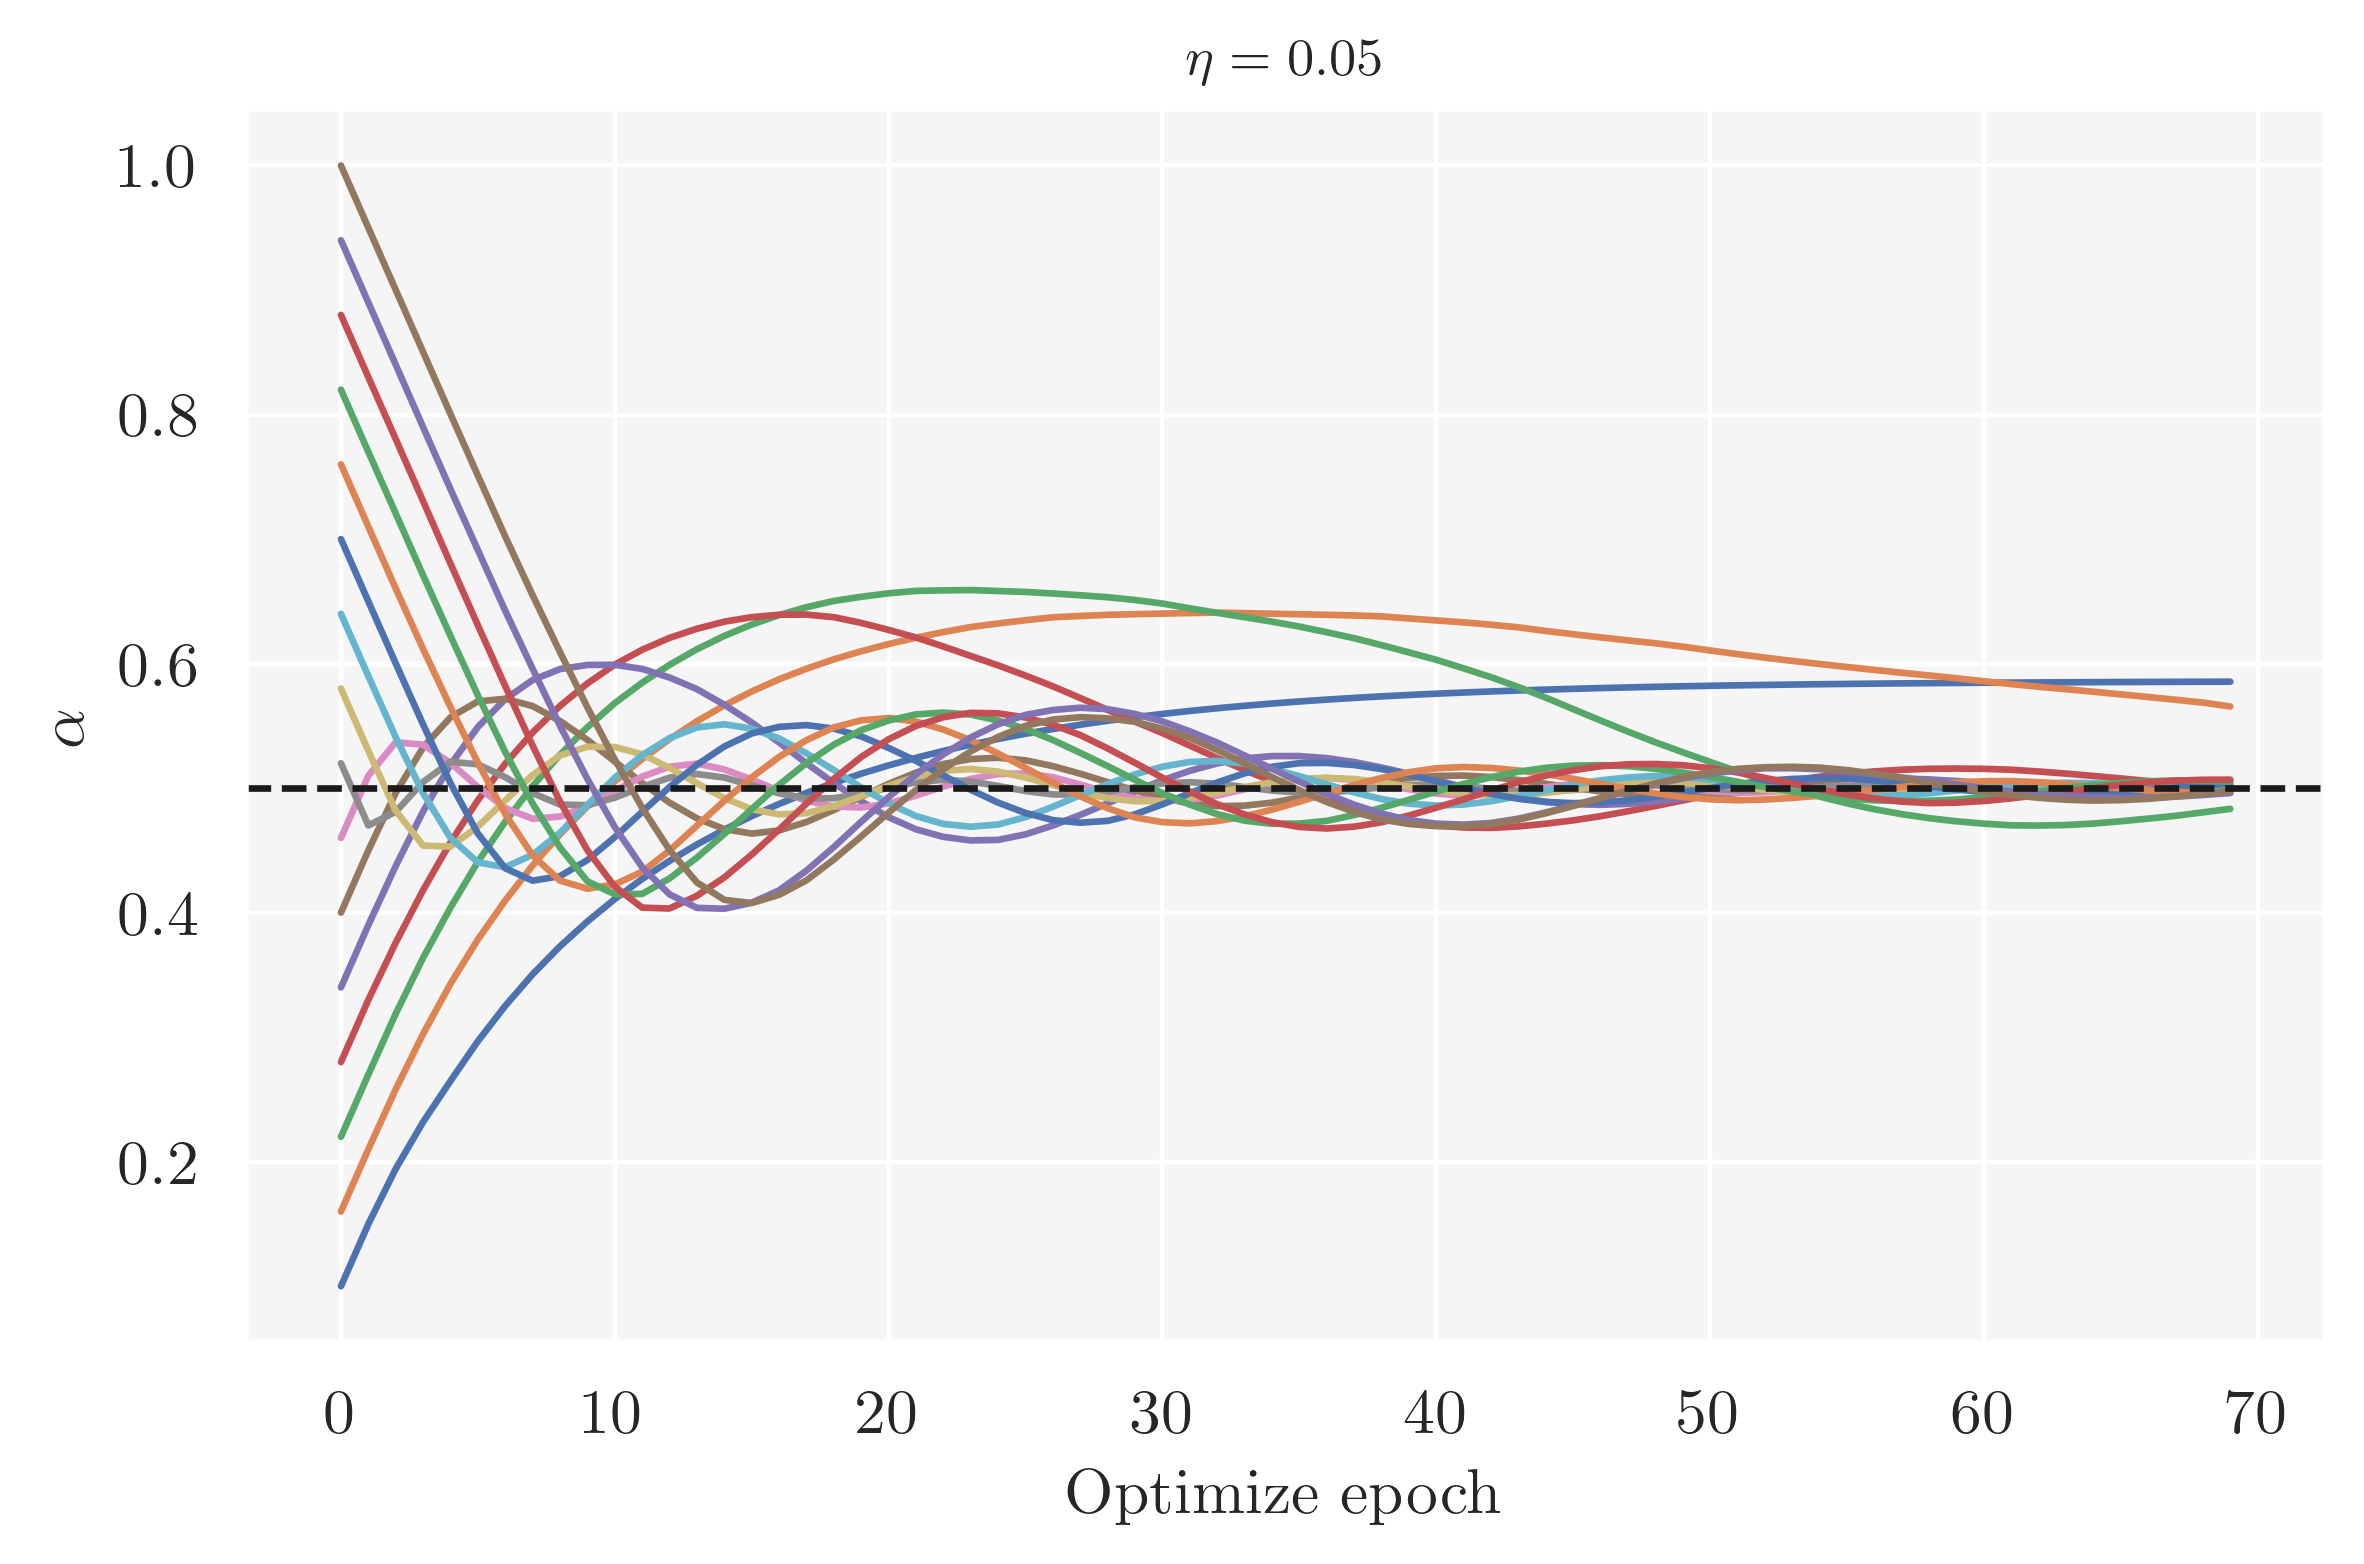

In [7]:
N = 2        # Number of particles
dim = 3      # Dimensionality

# Config
nsamples = 20000
nchains = 16
eta = 0.05
initial_alphas = np.linspace(0.1, 1.0, nchains)

# Instantiate wave function
wf = vmc.ASHONIB(N, dim)

# Set intial positions
initial_positions = []
for initial_alpha in initial_alphas:
    r0 = vmc.utils.safe_initial_positions(wf,
                                          initial_alpha,
                                          N,
                                          dim,
                                          interaction=False
                                         )
    initial_positions.append(r0)


# Instantiate sampler
sampler = vmc.experimental.LMHEvolution(wf)

start = time.time()
results = sampler.sample(nsamples,
                         initial_positions,
                         initial_alphas,
                         dt=0.5,
                         nchains=nchains,
                         seed=None,
                         tune=True,
                         tune_iter=10000,
                         tune_interval=500,
                         tol_tune=1e-5,
                         optimize=True,
                         max_iter=70000,
                         batch_size=1000,
                         gradient_method='adam',
                         eta=eta,
                         tol_optim=1e-5,
                         early_stop=False,
                         log=False,
                         logger_level="INFO",
                         )

end = time.time()
print("Sampler elapsed time:", end - start)

alpha_updates = sampler.alpha_updates 

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True, dpi=200)
for alpha_tmp in alpha_updates:
    ax.plot(alpha_tmp)

ax.set(xlabel="Optimize epoch", ylabel=r"$\alpha$", title=fr'$\eta={eta}$')
ax.axhline(0.5, ls='--', color='k')

fig.savefig(fig_path("alpha_epoch_lmh_ashonib_eta005.pdf"), bbox_inches='tight')

## eta = 0.1

Sampler elapsed time: 25.426794052124023


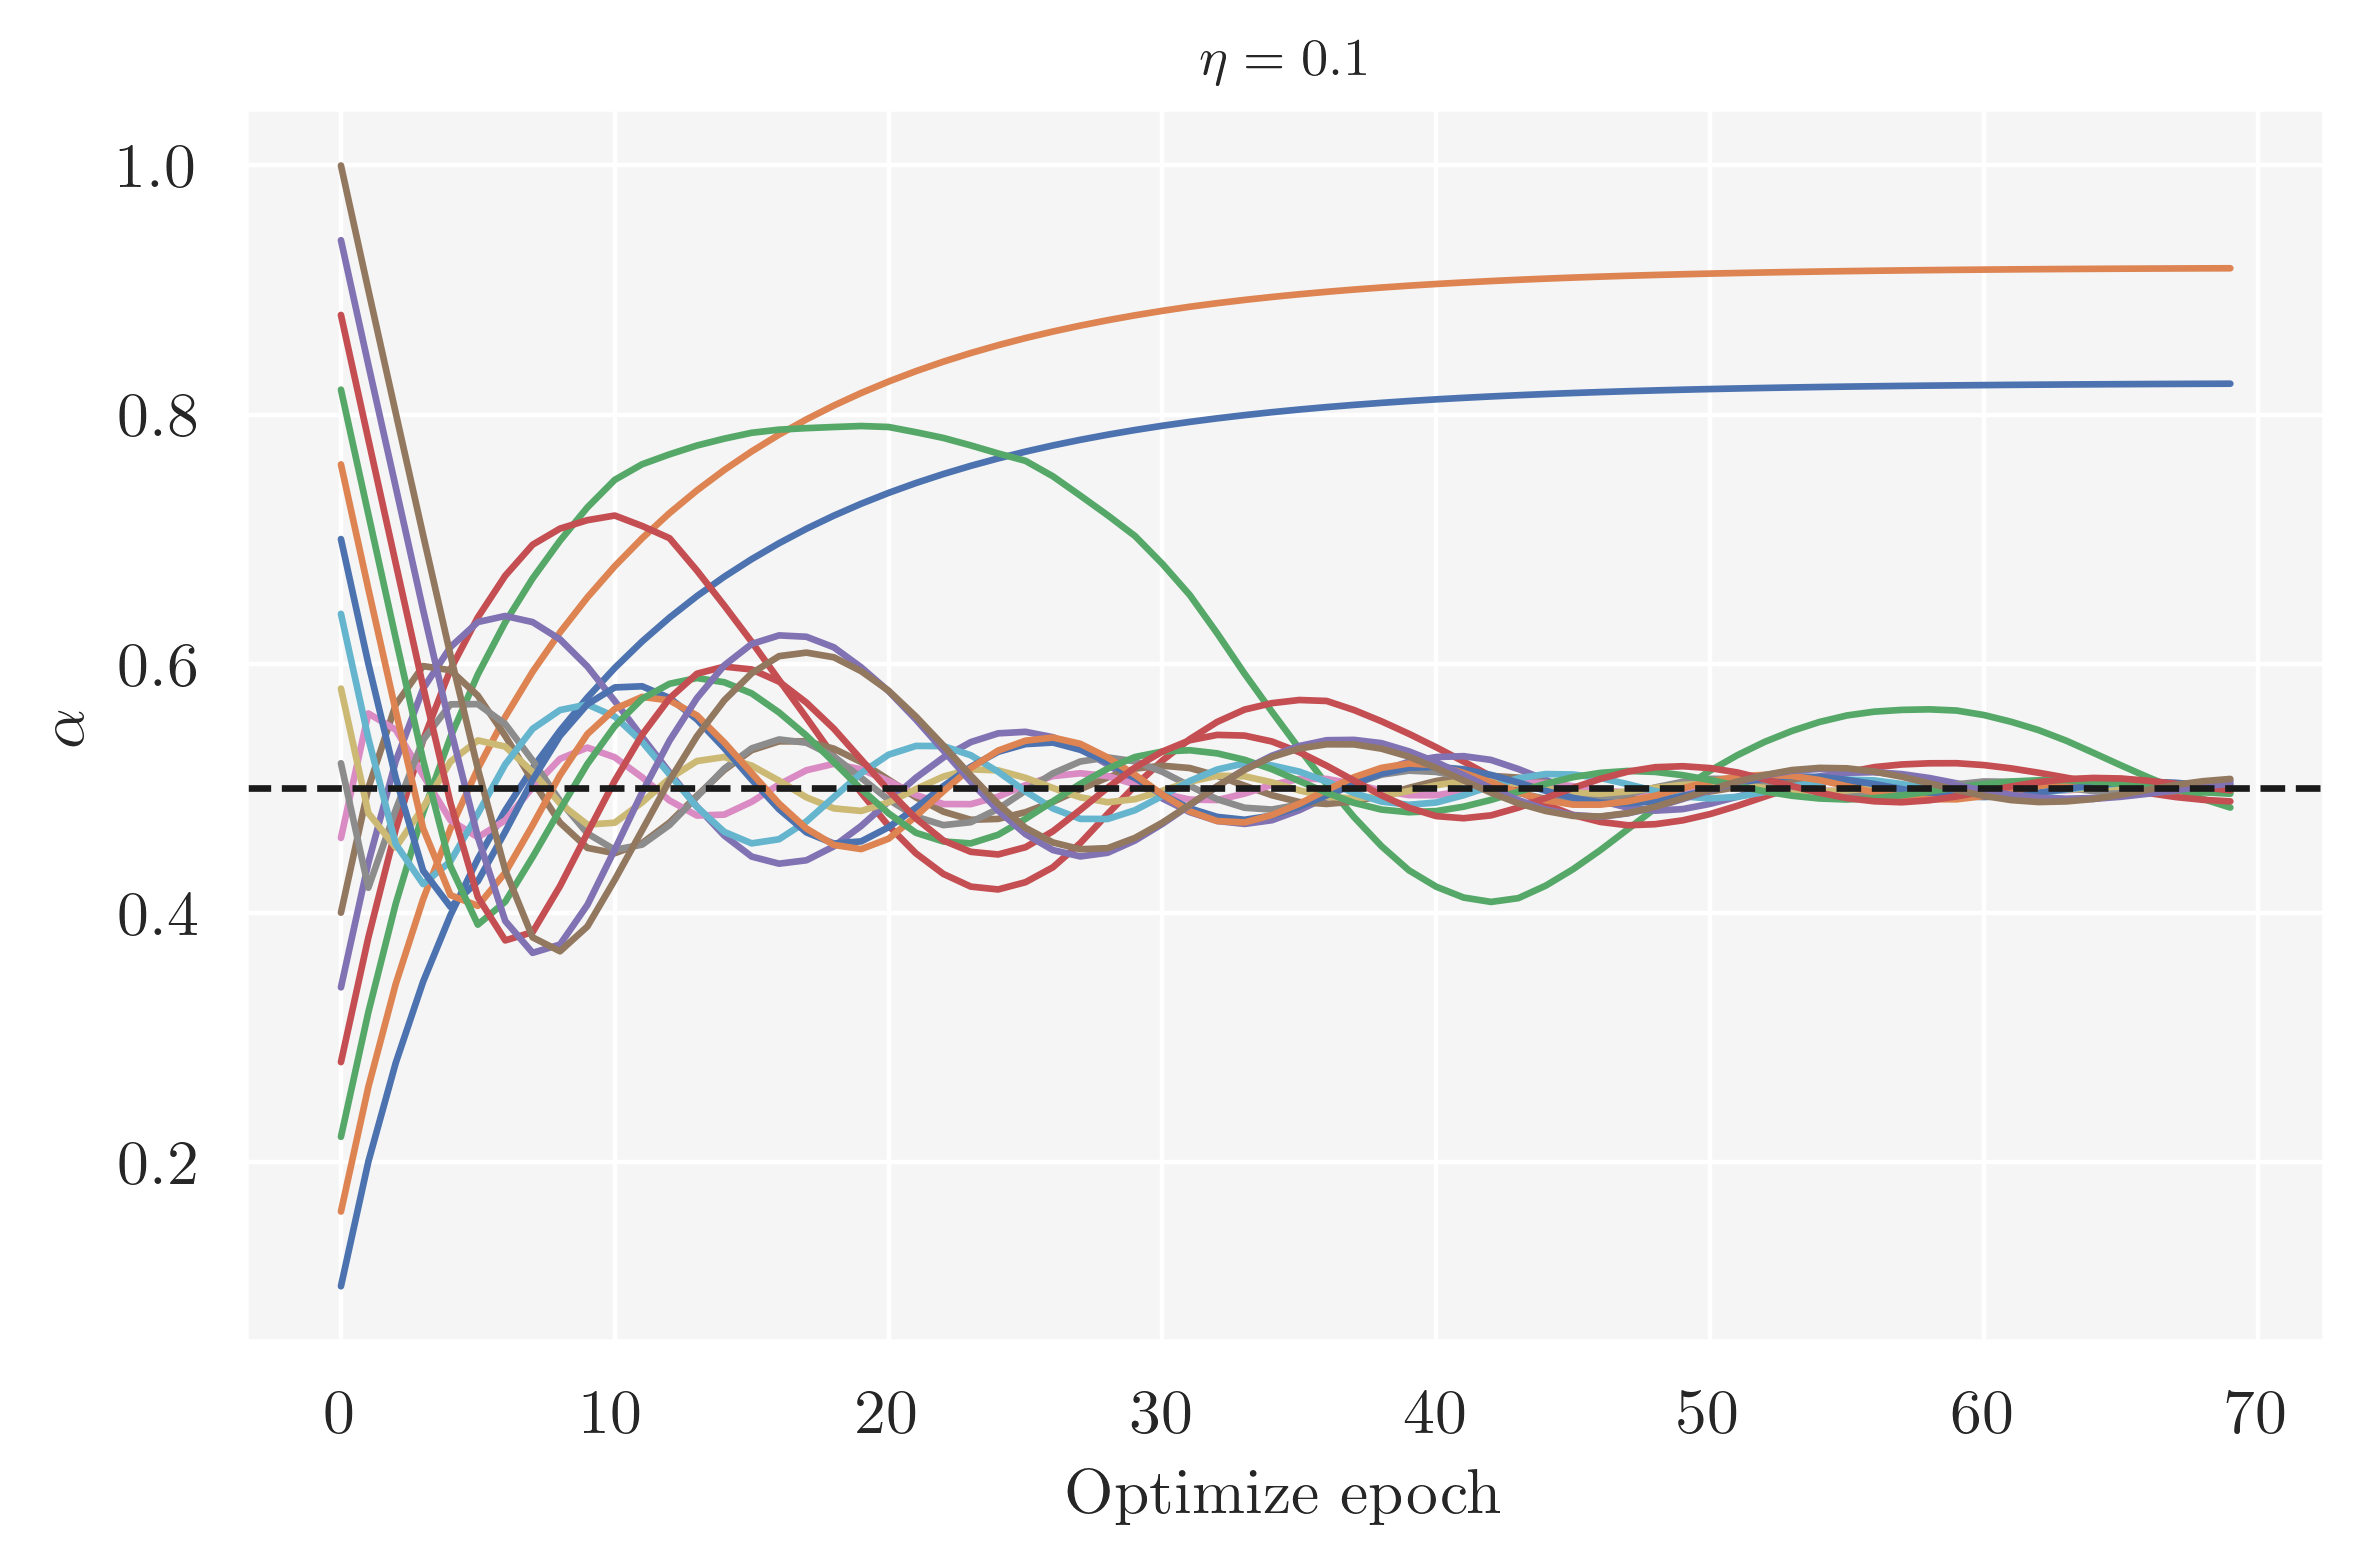

In [8]:
N = 2        # Number of particles
dim = 3      # Dimensionality

# Config
nsamples = 20000
nchains = 16
eta = 0.1
initial_alphas = np.linspace(0.1, 1.0, nchains)

# Instantiate wave function
wf = vmc.ASHONIB(N, dim)

# Set intial positions
initial_positions = []
for initial_alpha in initial_alphas:
    r0 = vmc.utils.safe_initial_positions(wf,
                                          initial_alpha,
                                          N,
                                          dim,
                                          interaction=False
                                         )
    initial_positions.append(r0)


# Instantiate sampler
sampler = vmc.experimental.LMHEvolution(wf)

start = time.time()
results = sampler.sample(nsamples,
                         initial_positions,
                         initial_alphas,
                         dt=0.5,
                         nchains=nchains,
                         seed=None,
                         tune=True,
                         tune_iter=10000,
                         tune_interval=500,
                         tol_tune=1e-5,
                         optimize=True,
                         max_iter=70000,
                         batch_size=1000,
                         gradient_method='adam',
                         eta=eta,
                         tol_optim=1e-5,
                         early_stop=False,
                         log=False,
                         logger_level="INFO",
                         )

end = time.time()
print("Sampler elapsed time:", end - start)

alpha_updates = sampler.alpha_updates 

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True, dpi=200)
for alpha_tmp in alpha_updates:
    ax.plot(alpha_tmp)

ax.set(xlabel="Optimize epoch", ylabel=r"$\alpha$", title=fr'$\eta={eta}$')
ax.axhline(0.5, ls='--', color='k')

fig.savefig(fig_path("alpha_epoch_lmh_ashonib_eta01.pdf"), bbox_inches='tight')

## eta = 0.5

Sampler elapsed time: 26.959509134292603


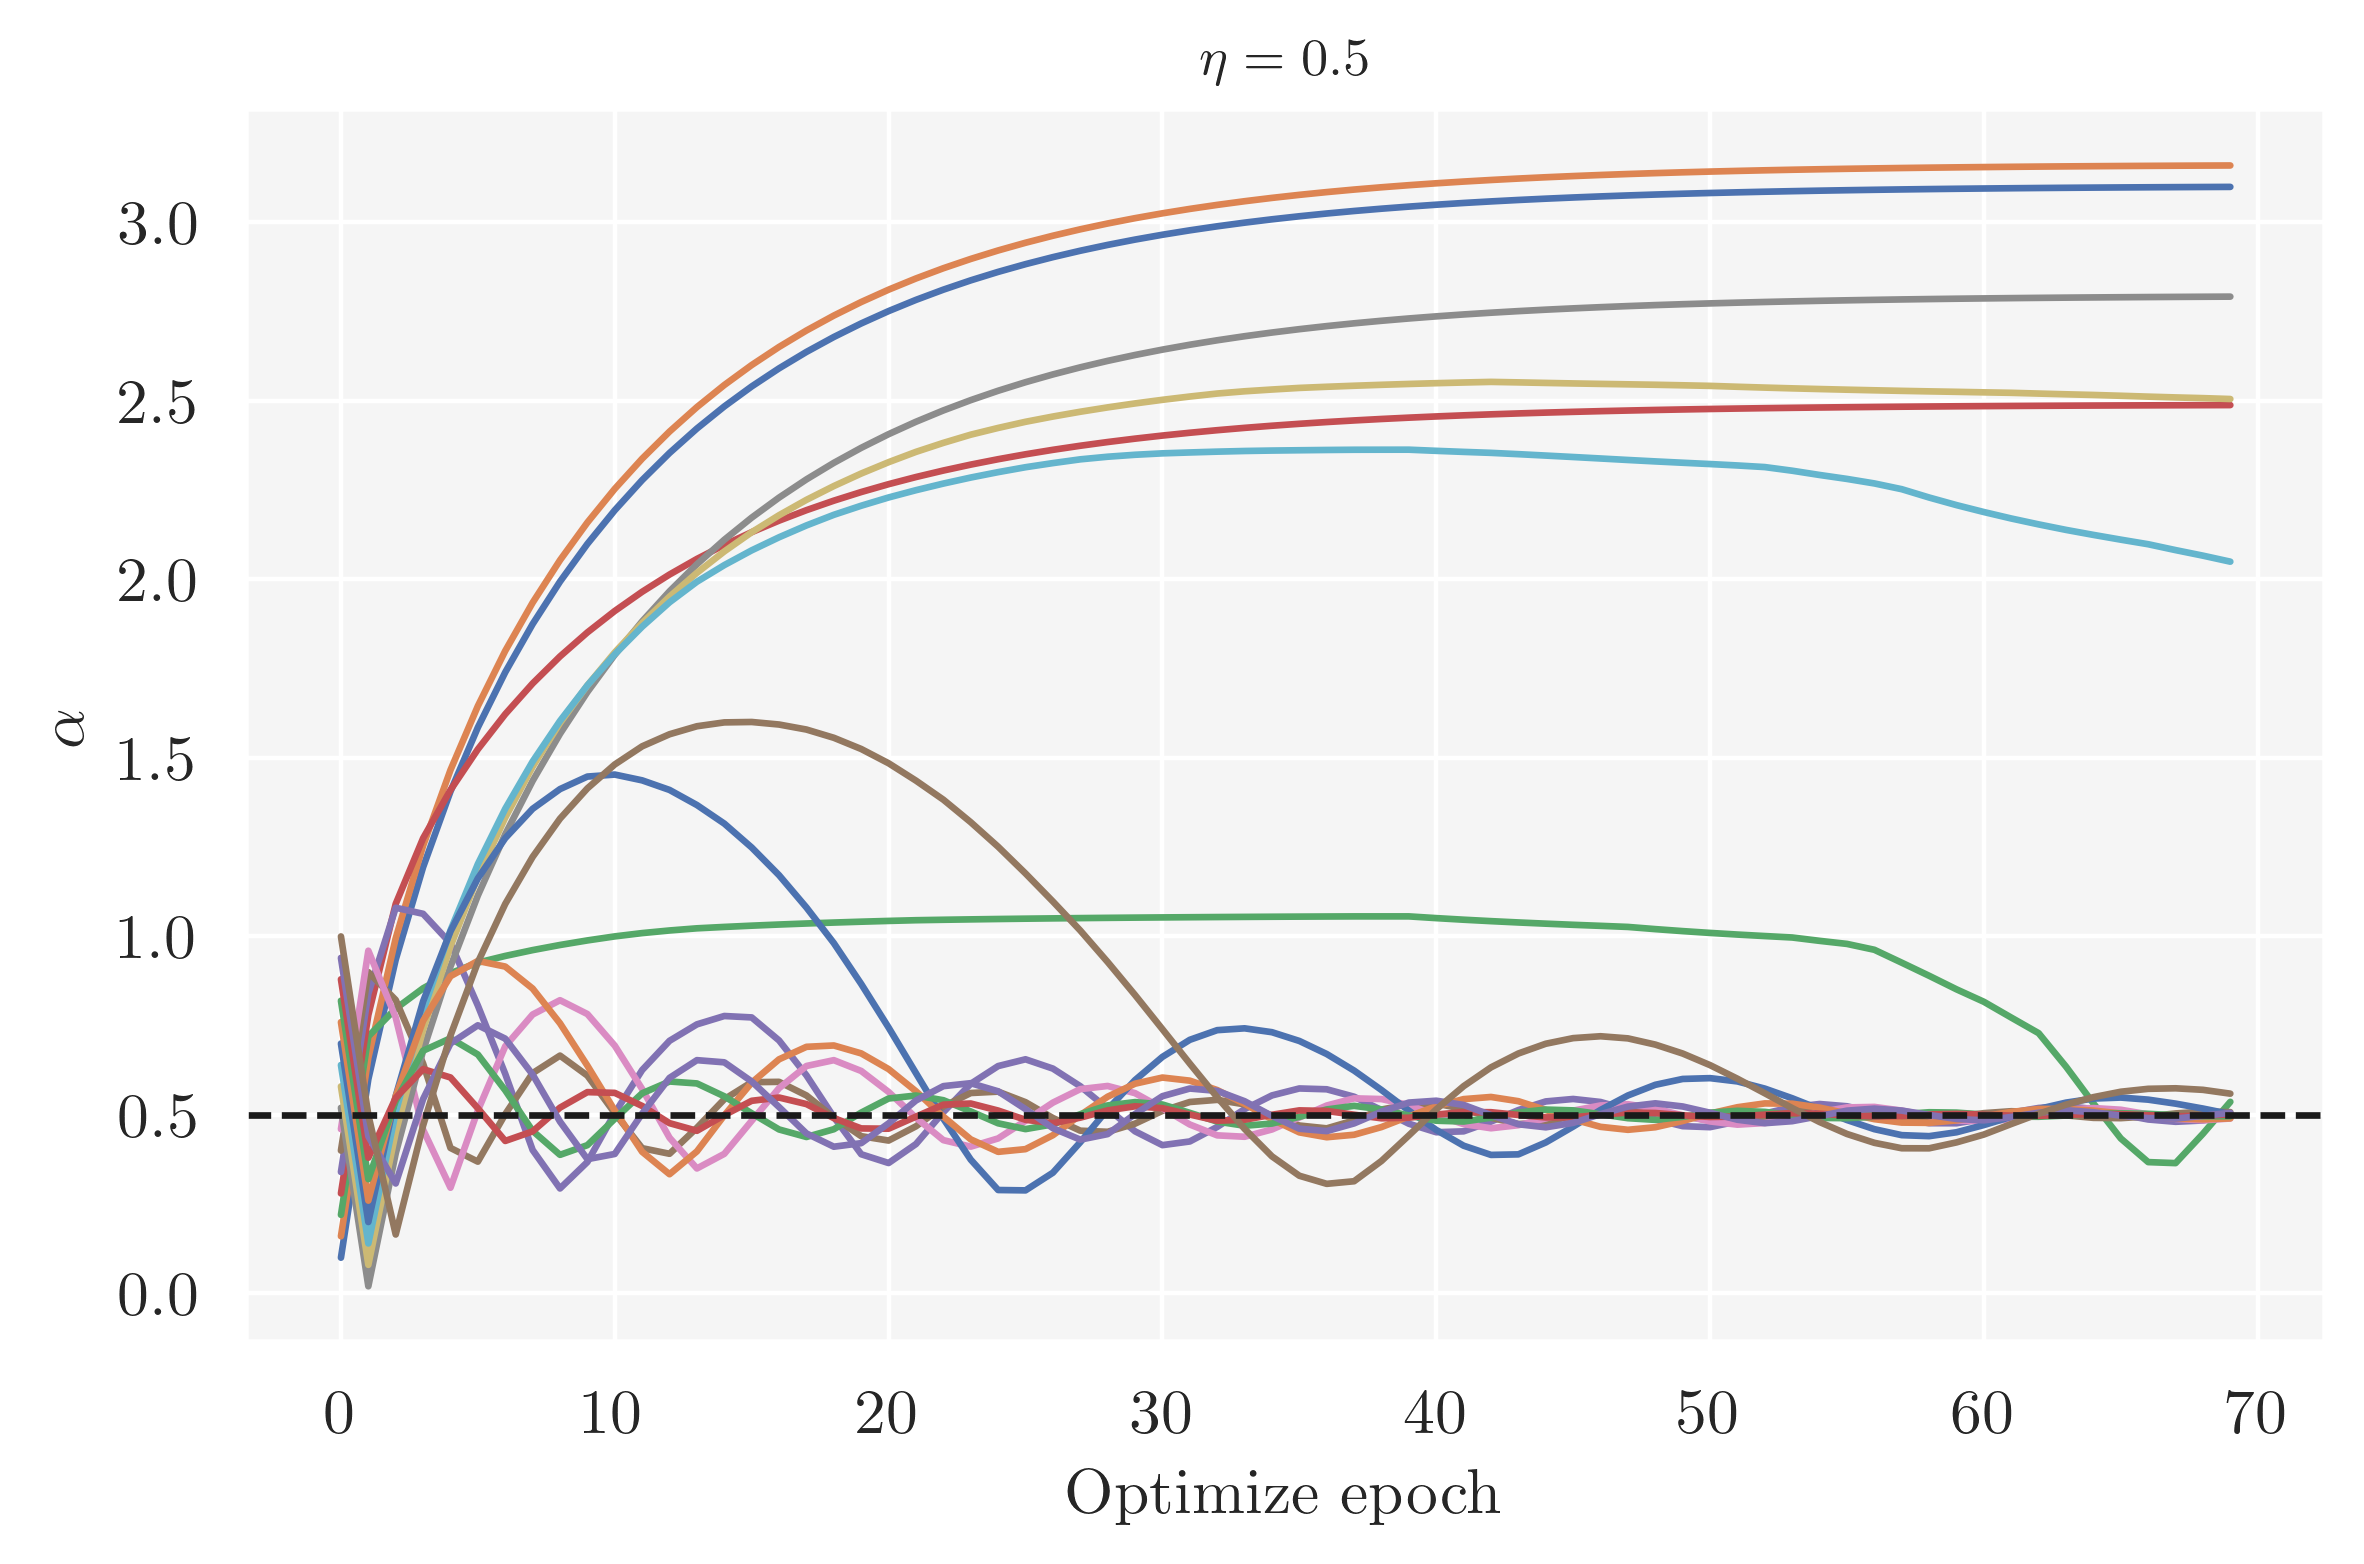

In [9]:
N = 2        # Number of particles
dim = 3      # Dimensionality

# Config
nsamples = 20000
nchains = 16
eta = 0.5
initial_alphas = np.linspace(0.1, 1.0, nchains)

# Instantiate wave function
wf = vmc.ASHONIB(N, dim)

# Set intial positions
initial_positions = []
for initial_alpha in initial_alphas:
    r0 = vmc.utils.safe_initial_positions(wf,
                                          initial_alpha,
                                          N,
                                          dim,
                                          interaction=False
                                         )
    initial_positions.append(r0)


# Instantiate sampler
sampler = vmc.experimental.LMHEvolution(wf)

start = time.time()
results = sampler.sample(nsamples,
                         initial_positions,
                         initial_alphas,
                         dt=0.5,
                         nchains=nchains,
                         seed=None,
                         tune=True,
                         tune_iter=10000,
                         tune_interval=500,
                         tol_tune=1e-5,
                         optimize=True,
                         max_iter=70000,
                         batch_size=1000,
                         gradient_method='adam',
                         eta=eta,
                         tol_optim=1e-5,
                         early_stop=False,
                         log=False,
                         logger_level="INFO",
                         )

end = time.time()
print("Sampler elapsed time:", end - start)

alpha_updates = sampler.alpha_updates 

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True, dpi=200)
for alpha_tmp in alpha_updates:
    ax.plot(alpha_tmp)

ax.set(xlabel="Optimize epoch", ylabel=r"$\alpha$", title=fr'$\eta={eta}$')
ax.axhline(0.5, ls='--', color='k')

fig.savefig(fig_path("alpha_epoch_lmh_ashonib_eta05.pdf"), bbox_inches='tight')